# The Electric Potential of a Square Hollow Tube
By Nils Petter Jørstad


### Introduction
The electric potential and field for a long, square, hollow tube was calculated by solving the Laplace equation in two dimensions. With four boundary conditions for each side of the square tube the solution takes the form of a Fourier series that was calculated numerically with a fixed number of Fourier coefficients. The equations used, details of this project and the results are found in the pdf attached to this repository.

In [55]:
import numpy as np
import matplotlib.pyplot as plt 

In [56]:
M = 100  ## order of fourrier series
N = 100  # Number of discretization points on x and y axis
L = 1    # Length of tube

x = np.linspace(0,L,N)
y = np.linspace(0,L,N)


Boundary conditions:

In [ ]:
# Potential boundary conditions 
v01 = np.sin(3*np.pi*x)
v02 = (1-(x-1/2)**4)
v03 = np.heaviside(x-1/2,1/4)*np.heaviside(3/4-x,3/8)

# Boundary condition used in calculations below
v0 = v01

Functions

In [70]:
def fourrier_coefficients(n,V):
    '''
        Returns the fourier coefficients used in the calculation
    '''
    Cn = 2/(np.sinh(np.pi*n))*np.trapz(V*np.sin(n*np.pi*x),x)
    return Cn

def solve_Laplace_tube(V0,M):
    '''
        solves the laplace equation for the potential in a tube for
        a given boundary condition for the backwall of the tube
    '''
    Cn = np.zeros(M, dtype=np.float64)
    V = np.zeros((N,N),dtype=np.float64)
    for n in range(M):
        Cn[n] = fourrier_coefficients(n+1,V0)
    for i in range(N): ## y
        for j in range(N): ### x
            XY = np.asarray([np.sin((n+1)*np.pi*x[j])*np.sinh((n+1)*np.pi*y[i]) for n in range(M)])
            V[i][j] = Cn @ XY
    return V

def convergence(v0):
    '''
    Convergence test
    '''
    n = 100
    M = np.linspace(1,200,n,dtype = np.int16)
    #print(M)
    diff = np.zeros(n,dtype=np.float64)
    for i in range(n):
        V= solve_Laplace_tube(v0, M[i]) 
        diff[i] = np.amax(np.abs(V[N-1][1:99]-v0[1:99]))
        #print(i)
        #diff[i] = np.sum(np.abs(v0-V[N-1]))
    return M, diff

In [65]:
## plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [66]:
## Make data.
X, Y = np.meshgrid(x, y)
Z = solve_Laplace_tube(v0, M) 

# Boundary condition used for the back wall of the tube 

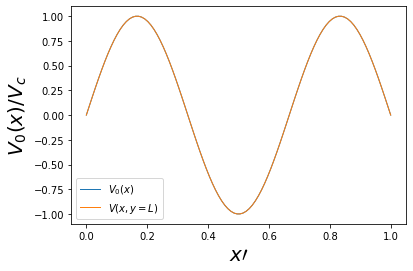

In [50]:
plt.figure('v01')
plt.plot(x,v01, linewidth=1, label = '$V_{0}(x)$')
plt.plot(x,Z[N-1], linewidth=1, label = '$V(x,y=L)$')
plt.xlabel('$x\prime$',fontsize=20)
plt.ylabel('$V_{0}(x)/V_{c}$',fontsize=20)
plt.legend()
#plt.savefig("V01.pdf", bbox_inches='tight')
plt.show()

# Electric Potential

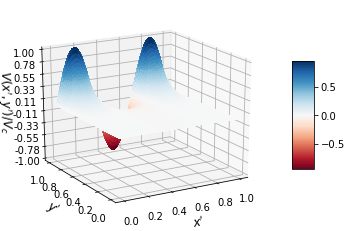

In [51]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('$x^{\prime}$',fontsize=12)
ax.set_ylabel('$y^{\prime}$',fontsize=12)
ax.set_zlabel('$V(x^{\prime},y^{\prime})/V_{c}$',fontsize=12)
ax.view_init(elev=20, azim=-120)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show() 

# Electric field

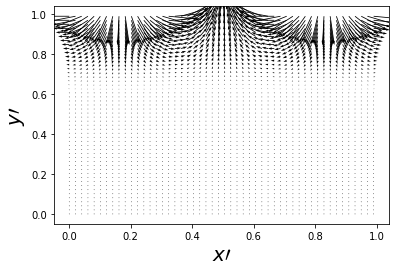

In [52]:
fig, ax = plt.subplots()
V = solve_Laplace_tube(v0,M) 
x, y = np.meshgrid(x,y)   
u = -1*np.gradient(V,axis = 1)
v = -1*np.gradient(V,axis = 0)

n = 2
skip=(slice(None,None,n),slice(None,None,n))

ax.quiver(x[skip], y[skip], u[skip], v[skip], scale = 1,label = 'E')
plt.xlabel('$x\prime$',fontsize=20)
plt.ylabel('$y\prime$',fontsize=20)
#plt.savefig("E1.pdf", bbox_inches='tight')
plt.show()

# Convergence test

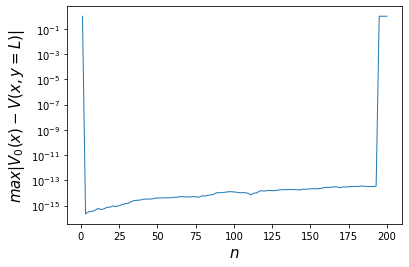

In [67]:
x, y = convergence(v0)
plt.figure('convergence v01')
plt.semilogy(x,y, linewidth=1)
plt.xlabel('$n$',fontsize=15)
plt.ylabel('$max|V_{0}(x)-V(x,y=L)|$',fontsize=15)
#plt.savefig("Conv3.pdf", bbox_inches='tight')
plt.show()